# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
sns.set()

# Get the data

In [2]:
raw_data=pd.read_csv("1.04. Real-life example.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Analyze the data 

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data_v0=raw_data.dropna(axis=0)
data_v0.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Deal with Outliers

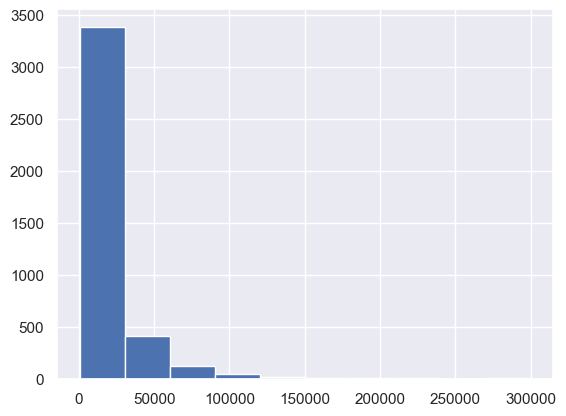

In [5]:
plt.hist(data_v0["Price"])
plt.show()

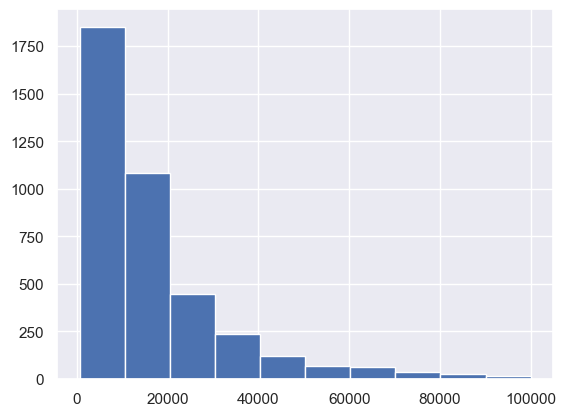

In [6]:
data_v1=data_v0[data_v0["Price"]<100000]
plt.hist(data_v1["Price"])
plt.show()

In [7]:
data_v1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3939,3939.000000,3939,3939.000000,3939.000000,3939,3939,3939.000000,3939
unique,7,NaN,6,NaN,NaN,4,2,NaN,300
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1515,NaN,NaN,1814,3568,NaN,188
mean,NaN,16753.924336,NaN,166.908860,2.737591,NaN,NaN,2006.187357,NaN
std,NaN,16112.483063,NaN,101.955639,4.983337,NaN,NaN,6.636306,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11200.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20755.625000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


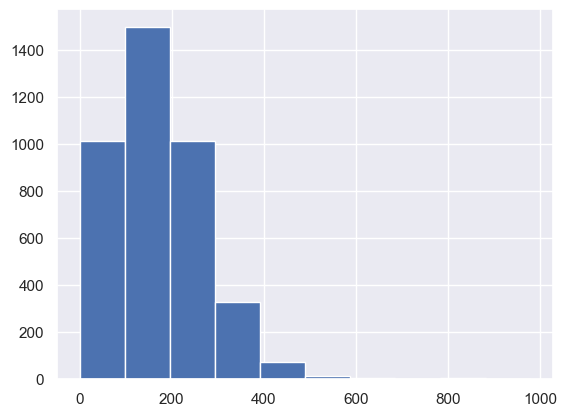

In [8]:
plt.hist(data_v1["Mileage"])
plt.show()

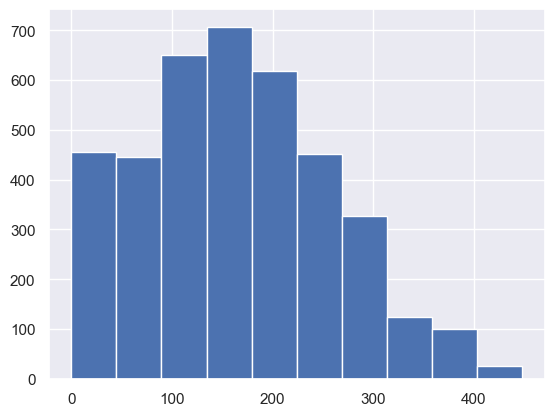

In [9]:
data_v2=data_v1[data_v1["Mileage"]<450]
plt.hist(data_v2["Mileage"])
plt.show()

In [10]:
data_v2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3905,3905.000000,3905,3905.000000,3905.000000,3905,3905,3905.000000,3905
unique,7,NaN,6,NaN,NaN,4,2,NaN,297
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,869,NaN,1502,NaN,NaN,1789,3537,NaN,186
mean,NaN,16823.523165,NaN,163.680154,2.740530,NaN,NaN,2006.265045,NaN
std,NaN,16118.513000,NaN,95.687008,5.004345,NaN,NaN,6.582287,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20859.150000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [11]:
data_v3=data_v2[data_v2["EngineV"] <= 6.5]
data_v3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3883,3883.000000,3883,3883.000000,3883.000000,3883,3883,3883.000000,3883
unique,7,NaN,6,NaN,NaN,4,2,NaN,296
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,864,NaN,1491,NaN,NaN,1782,3521,NaN,186
mean,NaN,16876.830276,NaN,163.485964,2.434365,NaN,NaN,2006.280968,NaN
std,NaN,16143.985936,NaN,95.719007,0.945613,NaN,NaN,6.581602,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.500000,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20900.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


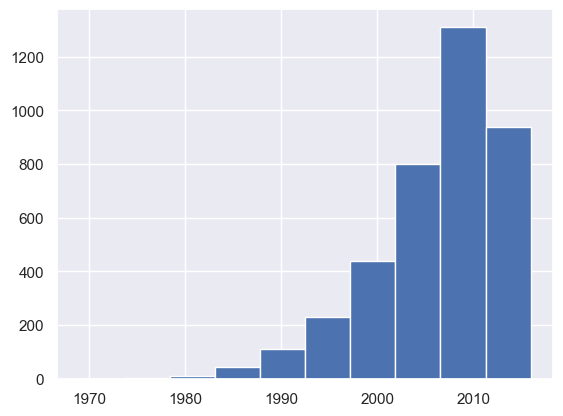

In [12]:
plt.hist(data_v3['Year'])
plt.show()

In [13]:
q=data_v3["Year"].quantile(0.01)
data_v4=data_v3[data_v3["Year"] > q]
data_v4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3828,3828.000000,3828,3828.000000,3828.000000,3828,3828,3828.000000,3828
unique,7,NaN,6,NaN,NaN,4,2,NaN,289
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,850,NaN,1458,NaN,NaN,1771,3466,NaN,181
mean,NaN,17072.254992,NaN,162.700104,2.441364,NaN,NaN,2006.593521,NaN
std,NaN,16167.136478,NaN,95.197227,0.948971,NaN,NaN,6.072670,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7191.750000,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21000.000000,NaN,229.000000,3.000000,NaN,NaN,2011.000000,NaN


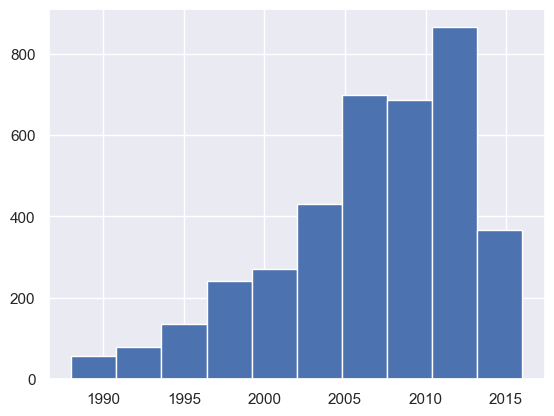

In [14]:
plt.hist(data_v4['Year'])
plt.show()

In [15]:
Cdata=data_v4.reset_index(drop=True)

In [16]:
Cdata.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3828,3828.000000,3828,3828.000000,3828.000000,3828,3828,3828.000000,3828
unique,7,NaN,6,NaN,NaN,4,2,NaN,289
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,850,NaN,1458,NaN,NaN,1771,3466,NaN,181
mean,NaN,17072.254992,NaN,162.700104,2.441364,NaN,NaN,2006.593521,NaN
std,NaN,16167.136478,NaN,95.197227,0.948971,NaN,NaN,6.072670,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7191.750000,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21000.000000,NaN,229.000000,3.000000,NaN,NaN,2011.000000,NaN


# Check about linearity

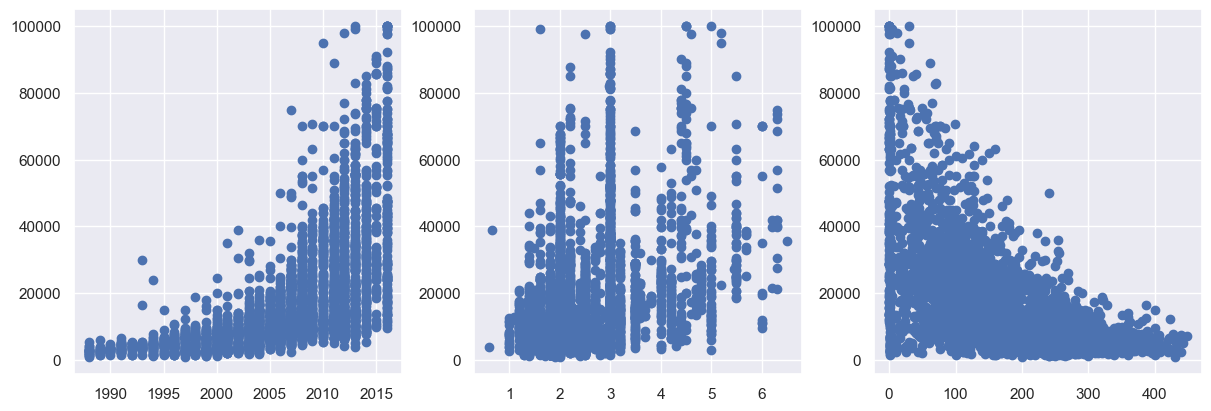

In [17]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(12,4))
ax1.scatter(Cdata['Year'],Cdata["Price"])
ax2.scatter(Cdata['EngineV'],Cdata["Price"])
ax3.scatter(Cdata['Mileage'],Cdata["Price"])
plt.show()

# Fix it using the log transformation

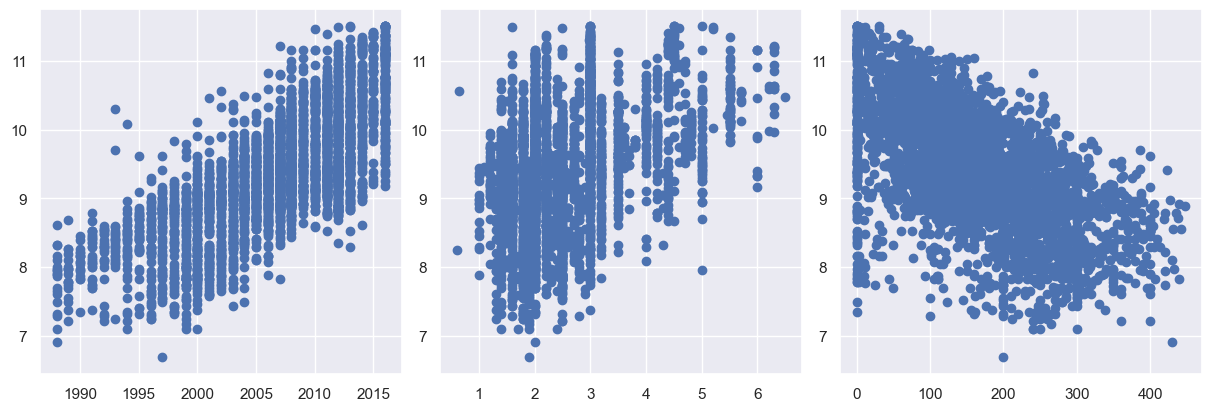

In [18]:
log_price=np.log(Cdata["Price"])
Cdata["log_price"]=log_price
fig, (ax12, ax22,ax32) = plt.subplots(1, 3, constrained_layout=True, figsize=(12,4))
ax12.scatter(Cdata['Year'],Cdata["log_price"])
ax22.scatter(Cdata['EngineV'],Cdata["log_price"])
ax32.scatter(Cdata['Mileage'],Cdata["log_price"])
plt.show()

In [19]:
Cdata=Cdata.drop(["Price"],axis=1)
Cdata.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
count,3828,3828,3828.000000,3828.000000,3828,3828,3828.000000,3828,3828.000000
unique,7,6,NaN,NaN,4,2,NaN,289,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,850,1458,NaN,NaN,1771,3466,NaN,181,NaN
mean,NaN,NaN,162.700104,2.441364,NaN,NaN,2006.593521,NaN,9.388863
std,NaN,NaN,95.197227,0.948971,NaN,NaN,6.072670,NaN,0.848108
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,6.684612
25%,NaN,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN,8.880688
50%,NaN,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN,9.350102
75%,NaN,NaN,229.000000,3.000000,NaN,NaN,2011.000000,NaN,9.952278


# check multicollinearity using VIF test

In [20]:
var=Cdata[["Year","Mileage","EngineV"]]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(var.values,i) for i in range(var.shape[1])]
vif["F"]=var.columns
vif

,vif,F
0,10.280183,Year
1,3.895950,Mileage
2,7.621164,EngineV


drop The value above or equal 10

# Deal with dummies (non numerical data)

In [21]:
data_6=Cdata
data_dum=pd.get_dummies(data_6,drop_first=True)
data_dum.describe(include='all')

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,...,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,162.700104,2.441364,2006.593521,9.388863,0.162226,0.188088,0.078892,0.113114,0.129049,0.222048,...,0.040230,0.002874,0.002874,0.028213,0.001567,0.009666,0.000784,0.003657,0.000261,0.001306
std,95.197227,0.948971,6.072670,0.848108,0.368706,0.390833,0.269606,0.316773,0.335298,0.415678,...,0.196524,0.053536,0.053536,0.165603,0.039565,0.097850,0.027987,0.060373,0.016163,0.036122
min,0.000000,0.600000,1988.000000,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,1.800000,2003.000000,8.880688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159.000000,2.200000,2008.000000,9.350102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,229.000000,3.000000,2011.000000,9.952278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,448.000000,6.500000,2016.000000,11.512915,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
target=data_dum["log_price"]
inputs=data_dum.drop(["log_price"],axis=1)

In [23]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [24]:
inputs_scaled=scaler.transform(inputs)

# Split the data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

In [26]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
yhat=reg.predict(x_train)

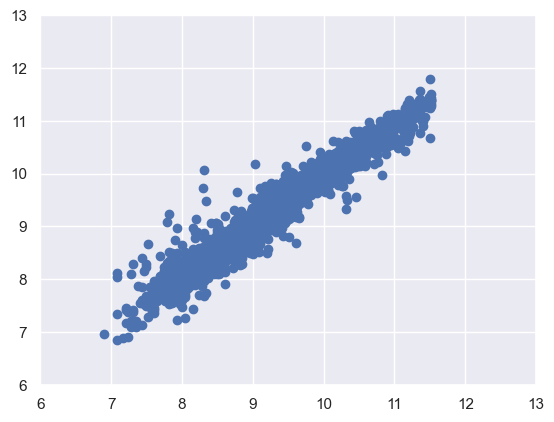

In [28]:
plt.scatter(y_train,yhat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [29]:
reg.score(x_train,y_train)

0.9381664153558708

# Calculate the Adjusted r squared

In [30]:
r2=reg.score(x_train,y_train)
n=x_train.shape[0]
p=x_train.shape[1]
print(1-(1-r2)*((n-1)/(n-p-1)))

0.9312985108545627


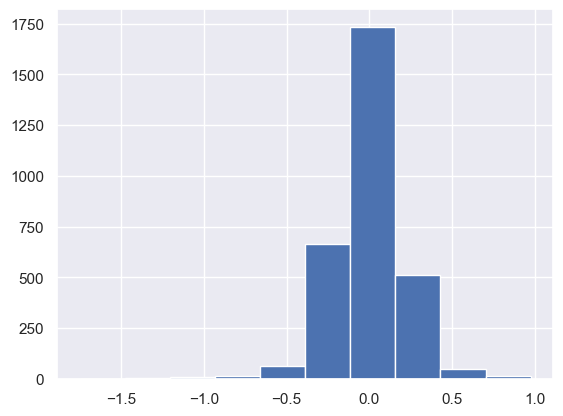

In [31]:
plt.hist(y_train-yhat)
plt.show()

In [32]:
yhat_test=reg.predict(x_test)

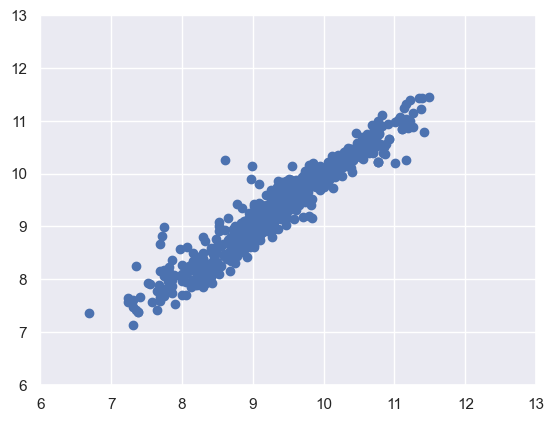

In [33]:
plt.scatter(y_test,yhat_test)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [34]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=["prediction"])
y_test=y_test.reset_index(drop=True)
df_pf["test"]=np.exp(y_test)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18476\3606467078.py:1: RuntimeWarning: overflow encountered in exp
  df_pf=pd.DataFrame(np.exp(yhat_test),columns=["prediction"])


# Check the difference bettween the real target and the predicted target	

In [35]:
df_pf["def"]=df_pf["test"]-df_pf["prediction"]
df_pf["def%"]=np.absolute((df_pf["def"]/df_pf["test"]) * 100)
df_pf

,prediction,test,def,def%
0,32387.153310,30800.0,-1587.153310,5.153095
1,11560.689123,12500.0,939.310877,7.514487
2,31127.416484,29500.0,-1627.416484,5.516666
3,35155.922329,39500.0,4344.077671,10.997665
4,4689.222189,5400.0,710.777811,13.162552
...,...,...,...,...
761,23338.984633,18950.0,-4388.984633,23.160869
762,10118.553593,8900.0,-1218.553593,13.691613
763,8396.259050,10700.0,2303.740950,21.530289
764,5489.622532,3200.0,-2289.622532,71.550704


In [36]:
df_pf.describe()

,prediction,test,def,def%
count,7.660000e+02,766.000000,7.660000e+02,766.000000
mean,inf,16904.016397,-inf,inf
std,NaN,15742.366419,NaN,NaN
min,0.000000e+00,800.000000,-inf,0.013637
25%,7.052799e+03,7200.000000,-1.497935e+03,5.563230
50%,1.180851e+04,11499.500000,-2.007882e+01,13.154714
75%,2.248259e+04,20500.000000,1.284893e+03,23.800468
max,inf,98000.000000,7.700000e+04,inf
